In [1]:
!wget https://raw.githubusercontent.com/newtonis/tps_imagenes/master/tp2/representacion_de_imagenes/atom.jpg

--2020-09-02 17:04:49--  https://raw.githubusercontent.com/newtonis/tps_imagenes/master/tp2/representacion_de_imagenes/atom.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 105128 (103K) [image/jpeg]
Saving to: ‘atom.jpg’

atom.jpg            100%[===================>] 102.66K  --.-KB/s    in 0.04s   

2020-09-02 17:04:50 (2.58 MB/s) - ‘atom.jpg’ saved [105128/105128]



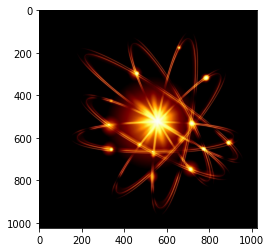

In [2]:
import cv2
import matplotlib.pyplot as plt
im_read = cv2.imread('atom.jpg')
img1024 = cv2.cvtColor(im_read, cv2.COLOR_BGR2RGB)
plt.imshow(img1024)

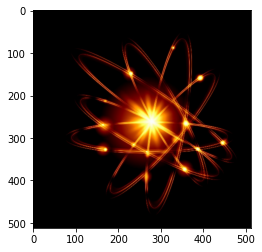

In [3]:
scale = 2
img512=img1024[::scale,::scale]
img256=img512[::scale,::scale]
img128=img256[::scale,::scale]
img64=img128[::scale,::scale]
img32=img64[::scale,::scale]

plt.imshow(img512)

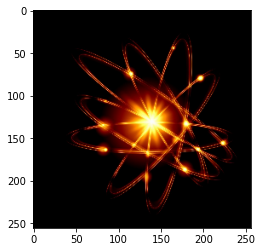

In [4]:
plt.imshow(img256)

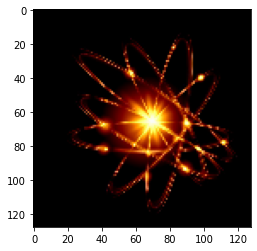

In [5]:
plt.imshow(img128)

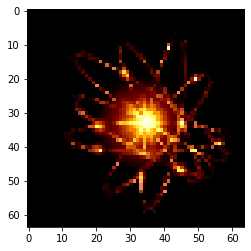

In [6]:
plt.imshow(img64)

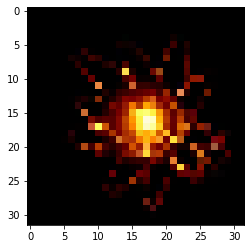

In [7]:
plt.imshow(img32)

# Color quantization 

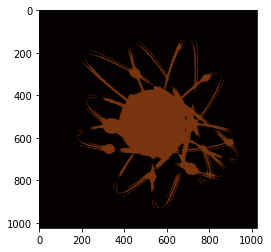

In [8]:
from PIL import Image  
import PIL  
  
# creating a image object (main image)  
im1 = Image.open(r"atom.jpg")  
  
# quantize a image  
im1 = im1.quantize(2)#256)  
  
# to show specified image  
im1.show()
plt.imshow(im1)

# Bit quantization

In [9]:
print(img1024[600:610,600:610,0])

[[208 209 227 248 255 239 237 244 255 255]
 [188 204 216 233 253 255 237 249 250 255]
 [177 197 201 217 237 255 255 242 242 251]
 [173 186 189 207 223 254 255 242 237 247]
 [167 172 179 194 213 233 255 255 240 239]
 [164 165 176 184 203 221 241 255 253 232]
 [166 163 171 180 190 202 210 255 255 239]
 [165 154 159 175 180 181 205 230 255 255]
 [159 158 158 161 171 182 195 207 246 255]
 [158 156 154 155 163 171 186 196 213 255]]


Cuantizacion de imagen con 2 bits

[  0  64 128 192]


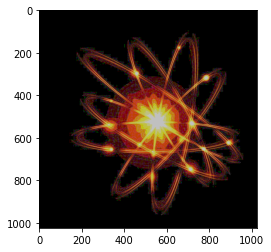

In [10]:
# asumiendo que mis imagenes tienen valores de 0 a 255 (8 bits)
# la nueva cuantizacion es de n bits con n < 8
# para poder hacer eso hacemos
import numpy as np
k = 2
img1024 = img1024.astype(np.uint8)
new_quant = np.array(range(0,255,256//(2**k)))  # (bajo) la cuantizacion a i bits
m,n,c = img1024.shape
new_quant_img = np.zeros_like(img1024)

print(new_quant)
for i in range(m):
    for j in range(n):
        for color in range(c):
            index = np.searchsorted(new_quant,img1024[i,j,color])
            if index >= len(new_quant):
                index = -1
            new_quant_img[i,j,color] = new_quant[index]
        
plt.imshow(new_quant_img)

In [11]:
!wget https://raw.githubusercontent.com/newtonis/tps_imagenes/master/tp2/representacion_de_imagenes/aliasimg.PNG

--2020-09-02 17:05:07--  https://raw.githubusercontent.com/newtonis/tps_imagenes/master/tp2/representacion_de_imagenes/aliasimg.PNG
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 822710 (803K) [image/png]
Saving to: ‘aliasimg.PNG’

aliasimg.PNG        100%[===================>] 803.43K  --.-KB/s    in 0.1s    

2020-09-02 17:05:08 (7.00 MB/s) - ‘aliasimg.PNG’ saved [822710/822710]



#Ejemplos de aliasing por muestrear con menores frecuencias espaciales

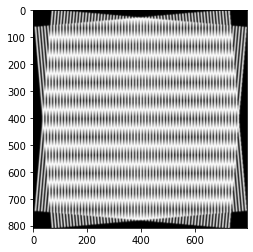

In [12]:
import cv2
import matplotlib.pyplot as plt
im_read = cv2.imread('aliasimg.PNG')
plt.imshow(im_read)

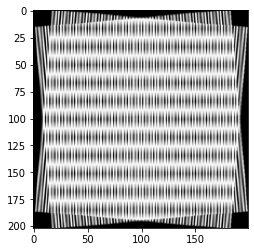

In [13]:
plt.imshow(im_read[::4,::4])

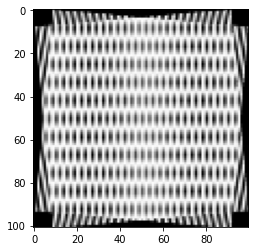

In [14]:
plt.imshow(im_read[::8,::8])

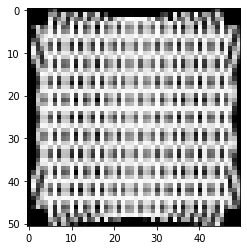

In [15]:
plt.imshow(im_read[::16,::16])

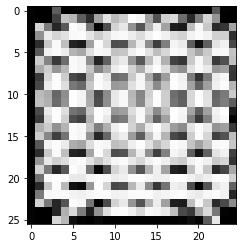

In [16]:
plt.imshow(im_read[::32,::32])